In [162]:
# Data Manipulation Libraries 
import pandas as pd 

# Data Visualization Libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

# Machine Learning Libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Others 
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

In [163]:
df = pd.read_csv(r"H:\Programming\Files\Machine Learning\Files\Social_Network_Ads.csv")
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


## Data Understanding

In [165]:
print("Info:")
print(df.info())
print("\nNaN Values:")
print(df.isnull().sum())
print("\nDuplicated:")
print(df.duplicated().sum())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None

NaN Values:
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Duplicated:
33


## Data Cleaning

In [167]:
# df.drop_duplicates(inplace=True)
# df.duplicated().sum()

## Explorartory Data Analysis

In [169]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

## Modeling

In [171]:
x = df.iloc[:,:-1]
y = df['Purchased']

In [172]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [173]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [174]:
scr = round(lr.score(x_test, y_test),4)*100
scr

88.75

In [175]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [176]:
prd = lr.predict([[46, 41000]])   # real 1, prd 0 . which is wrong predict for imbalence of y .
prd

array([0], dtype=int64)

In [177]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

# Imblearn

## *RandomUnderSampler*

In [180]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
rus_x, rus_y = rus.fit_resample(x,y)

In [181]:
rus_y.value_counts()

Purchased
0    143
1    143
Name: count, dtype: int64

In [182]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(rus_x, rus_y, test_size=0.2, random_state=42)


In [183]:
lr2 = LogisticRegression()
lr2.fit(x_train_2, y_train_2)

LogisticRegression()

In [184]:
rus_score = round(lr2.score(x_test_2, y_test_2),4)*100
rus_score

77.59

In [185]:
rus_prd = lr2.predict([[46, 41000]]) # real 1 and prd 1 . which is correct by using imblearn for balence y
rus_prd

array([1], dtype=int64)

## *RandomOverSampler*

In [187]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
ros_x, ros_y = ros.fit_resample(x,y)

In [188]:
ros_y.value_counts()

Purchased
0    257
1    257
Name: count, dtype: int64

In [189]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(ros_x, ros_y, test_size=0.2, random_state=42)


In [190]:
lr3 = LogisticRegression()
lr3.fit(x_train_3, y_train_3)

LogisticRegression()

In [191]:
ros_score = round(lr3.score(x_test_3, y_test_3), 4)*100
ros_score

86.41

In [192]:
ros_prd = lr3.predict([[46, 41000]]) # real 1 and prd 1 . which is correct by using imblearn for balence y
ros_prd

array([1], dtype=int64)

# Summary 

In [194]:
print("Without Imblearn(Balance Data)")
print(f"Score: {scr}%")
print(prd)
print("\nRandomUnderSampler")
print(f"Score: {rus_score}%")
print(rus_prd)
print("\nRandomOverSampler")
print(f"Score: {ros_score}%")
print(ros_prd)

Without Imblearn(Balance Data)
Score: 88.75%
[0]

RandomUnderSampler
Score: 77.59%
[1]

RandomOverSampler
Score: 86.41%
[1]


               Method  Accuracy
0         No Sampling     83.75
5            NearMiss     83.75
1   RandomOverSampler     80.00
3     BorderlineSMOTE     80.00
6          SMOTETomek     80.00
7            SMOTEENN     80.00
2               SMOTE     78.75
4  RandomUnderSampler     77.50


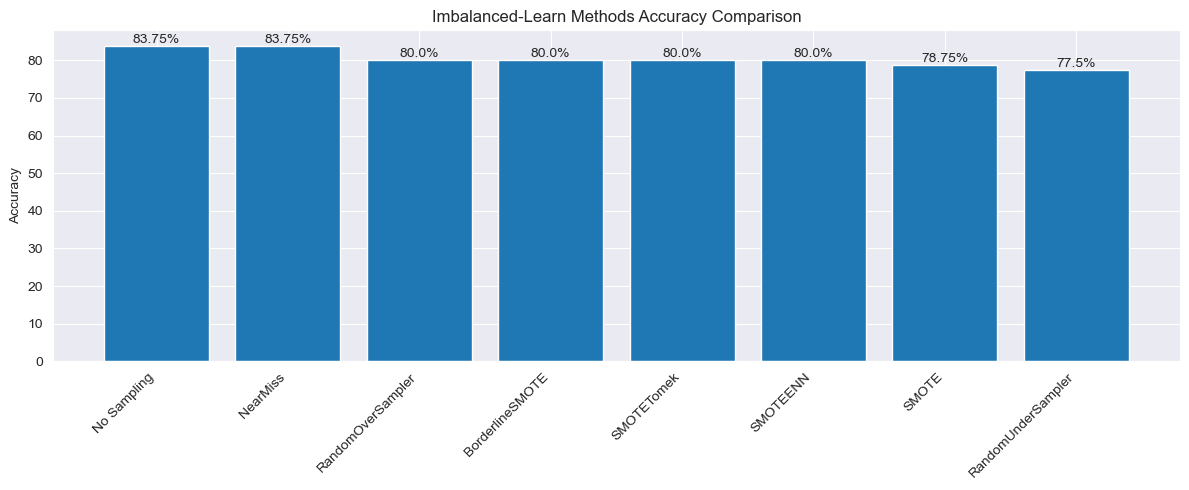

In [250]:
# ======================================================
# 1. IMPORT LIBRARIES
# ======================================================
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTETomek, SMOTEENN


# ======================================================
# 2. FEATURES & TARGET
# ======================================================
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


# ======================================================
# 3. TRAIN–TEST SPLIT
# ======================================================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# ======================================================
# 4. PIPELINES WITH ALL IMBLEARN METHODS
# ======================================================
pipelines = {
    "No Sampling": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=1000))
    ]),

    "RandomOverSampler": Pipeline([
        ("scaler", StandardScaler()),
        ("sampler", RandomOverSampler(random_state=42)),
        ("model", LogisticRegression(max_iter=1000))
    ]),

    "SMOTE": Pipeline([
        ("scaler", StandardScaler()),
        ("sampler", SMOTE(random_state=42)),
        ("model", LogisticRegression(max_iter=1000))
    ]),

    "BorderlineSMOTE": Pipeline([
        ("scaler", StandardScaler()),
        ("sampler", BorderlineSMOTE(random_state=42)),
        ("model", LogisticRegression(max_iter=1000))
    ]),

    "RandomUnderSampler": Pipeline([
        ("scaler", StandardScaler()),
        ("sampler", RandomUnderSampler(random_state=42)),
        ("model", LogisticRegression(max_iter=1000))
    ]),

    "NearMiss": Pipeline([
        ("scaler", StandardScaler()),
        ("sampler", NearMiss()),
        ("model", LogisticRegression(max_iter=1000))
    ]),

    "SMOTETomek": Pipeline([
        ("scaler", StandardScaler()),
        ("sampler", SMOTETomek(random_state=42)),
        ("model", LogisticRegression(max_iter=1000))
    ]),

    "SMOTEENN": Pipeline([
        ("scaler", StandardScaler()),
        ("sampler", SMOTEENN(random_state=42)),
        ("model", LogisticRegression(max_iter=1000))
    ])
}


# ======================================================
# 5. TRAIN, TEST & COLLECT ACCURACY
# ======================================================
results = []

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = round(accuracy_score(y_test, y_pred), 4)*100
    results.append({"Method": name, "Accuracy": acc})


# ======================================================
# 6. SORT RESULTS (DESCENDING)
# ======================================================
results_df = pd.DataFrame(results).sort_values(
    by="Accuracy",
    ascending=False
)

print(results_df)


# ======================================================
# 7. BAR PLOT (ACCURACY COMPARISON)
# ======================================================
plt.figure(figsize=(12, 5))

bars = plt.bar(results_df["Method"], results_df["Accuracy"])

plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Imbalanced-Learn Methods Accuracy Comparison")

# --------------------------------------------------
# ADD ACCURACY VALUE ON TOP OF EACH BAR
# --------------------------------------------------
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}%",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()



               Method  Accuracy (%)
0         No Sampling         83.75
1            NearMiss         82.50
2     BorderlineSMOTE         80.00
3            SMOTEENN         80.00
4   RandomOverSampler         78.75
5               SMOTE         78.75
6  RandomUnderSampler         78.75
7          SMOTETomek         78.75


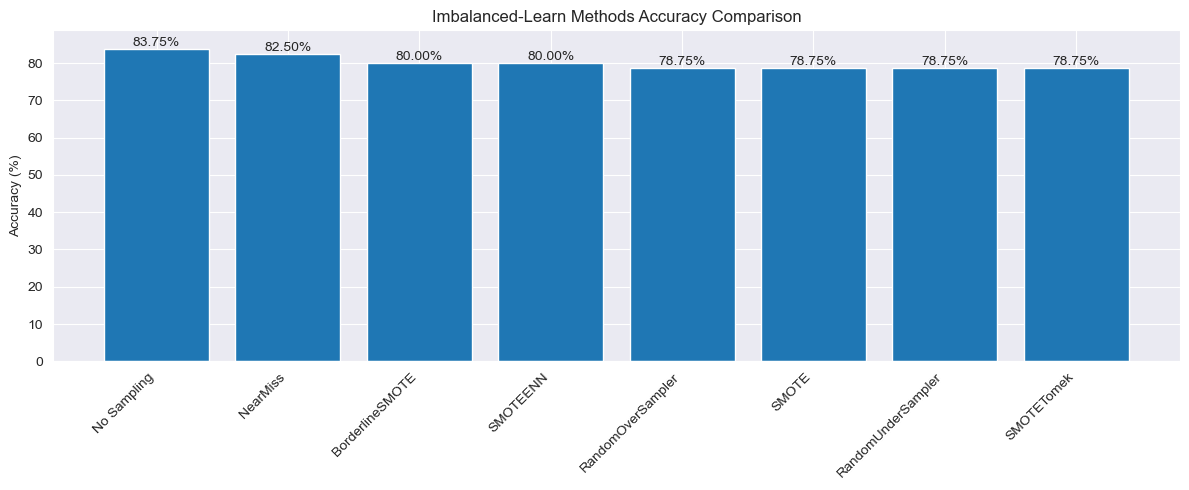

In [260]:
# ======================================================
# 1. IMPORT LIBRARIES
# ======================================================
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTETomek, SMOTEENN


# ======================================================
# 2. FEATURES & TARGET
# ======================================================
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


# ======================================================
# 3. TRAIN–TEST SPLIT (ALWAYS FIRST)
# ======================================================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# ======================================================
# 4. PIPELINES WITH ALL IMBLEARN METHODS
# ======================================================
pipelines = {
    "No Sampling": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(
            max_iter=1000,
            solver="liblinear",
            random_state=42
        ))
    ]),

    "RandomOverSampler": Pipeline([
        ("scaler", StandardScaler()),
        ("sampler", RandomOverSampler(random_state=42)),
        ("model", LogisticRegression(
            max_iter=1000,
            solver="liblinear",
            random_state=42
        ))
    ]),

    "SMOTE": Pipeline([
        ("scaler", StandardScaler()),
        ("sampler", SMOTE(random_state=42)),
        ("model", LogisticRegression(
            max_iter=1000,
            solver="liblinear",
            random_state=42
        ))
    ]),

    "BorderlineSMOTE": Pipeline([
        ("scaler", StandardScaler()),
        ("sampler", BorderlineSMOTE(random_state=42)),
        ("model", LogisticRegression(
            max_iter=1000,
            solver="liblinear",
            random_state=42
        ))
    ]),

    "RandomUnderSampler": Pipeline([
        ("scaler", StandardScaler()),
        ("sampler", RandomUnderSampler(random_state=42)),
        ("model", LogisticRegression(
            max_iter=1000,
            solver="liblinear",
            random_state=42
        ))
    ]),

    "NearMiss": Pipeline([
        ("scaler", StandardScaler()),
        ("sampler", NearMiss()),
        ("model", LogisticRegression(
            max_iter=1000,
            solver="liblinear",
            random_state=42
        ))
    ]),

    "SMOTETomek": Pipeline([
        ("scaler", StandardScaler()),
        ("sampler", SMOTETomek(random_state=42)),
        ("model", LogisticRegression(
            max_iter=1000,
            solver="liblinear",
            random_state=42
        ))
    ]),

    "SMOTEENN": Pipeline([
        ("scaler", StandardScaler()),
        ("sampler", SMOTEENN(random_state=42)),
        ("model", LogisticRegression(
            max_iter=1000,
            solver="liblinear",
            random_state=42
        ))
    ])
}


# ======================================================
# 5. TRAIN → TEST → COLLECT ACCURACY (%)
# ======================================================
results = []

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    results.append({
        "Method": name,
        "Accuracy (%)": round(acc, 2)
    })


# ======================================================
# 6. SORT RESULTS (DESCENDING)
# ======================================================
results_df = (
    pd.DataFrame(results)
    .sort_values(by="Accuracy (%)", ascending=False)
    .reset_index(drop=True)
)


print(results_df)


# ======================================================
# 7. BAR PLOT WITH ACCURACY VALUES
# ======================================================
plt.figure(figsize=(12, 5))

bars = plt.bar(
    results_df["Method"],
    results_df["Accuracy (%)"]
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy (%)")
plt.title("Imbalanced-Learn Methods Accuracy Comparison")

# Add headroom for labels
plt.ylim(0, results_df["Accuracy (%)"].max() + 5)

# Display values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}%",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()
